In [4]:
import scanpy
import torch

In [5]:
!ls

ACDNE		       HiAGM	      Pretrain-NER
BioTech		       HMC_methods    RL-TKDE
C-HMCNN		       HMDG	      TaskEENER
CONNA		       HMLC2022       TCforSciTech
data		       HMLC_baseline  tmp
DisciplineEmbedding    HMT	      word2vec.model
DisciplineTransformer  HMTransformer  word2vec.model.syn1neg.npy
ExampleBaseNER	       KGHMT	      word2vec.model.wv.vectors.npy
GCNMeta		       KG_Related


In [6]:
adt_feature = scanpy.read_h5ad('./BioTech/data/ADT.h5ad')

In [7]:
sct_feature = scanpy.read_h5ad('./BioTech/data/SCT.h5ad')

/home/xiaomeng/miniconda3/envs/shaow/lib/python3.9/site-packages/anndata/compat/__init__.py:232: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [7]:
adt_f = adt_feature.X
cols = adt_feature.var['features']

In [54]:
cell_type_l1

L1_AAACCCAAGAAACTCA      4
L1_AAACCCAAGACATACA      1
L1_AAACCCACAACTGGTT      2
L1_AAACCCACACGTACTA      5
L1_AAACCCACAGCATACT      2
                        ..
E2L8_TTTGTTGGTCGTGATT    2
E2L8_TTTGTTGGTGTGCCTG    4
E2L8_TTTGTTGGTTAGTTCG    0
E2L8_TTTGTTGGTTGGCTAT    4
E2L8_TTTGTTGTCTCATGGA    4
Name: celltype.l1, Length: 161764, dtype: int32

In [8]:
cell_type_l1 = adt_feature.obs['celltype.l1']
cell_type_l2 = adt_feature.obs['celltype.l2']
cell_type_l3 = adt_feature.obs['celltype.l3']
print(cell_type_l1.describe())
print(cell_type_l2.describe())
print(cell_type_l3.describe())
edge_dict = set()
for index, l1 in enumerate(cell_type_l1):
	l2 = cell_type_l2[index]
	l3 = cell_type_l3[index]
	edge_dict.add(f'l1:{l1}=>l2:{l2}=>l3:{l3}')

	# edge_dict.add(f'l1:{l2}=>l2:{l3}')
print(edge_dict)
print(len(edge_dict))

count    161764.000000
mean          2.845139
std           1.882180
min           0.000000
25%           1.000000
50%           3.000000
75%           4.000000
max           7.000000
Name: celltype.l1, dtype: float64
count    161764.000000
mean         10.505199
std           7.803747
min           0.000000
25%           4.000000
50%           7.000000
75%          14.000000
max          30.000000
Name: celltype.l2, dtype: float64
count    161764.000000
mean         19.932241
std          15.618279
min           0.000000
25%           8.000000
50%          11.000000
75%          29.000000
max          57.000000
Name: celltype.l3, dtype: float64
{'l1:7=>l2:20=>l3:42', 'l1:6=>l2:21=>l3:43', 'l1:5=>l2:24=>l3:48', 'l1:3=>l2:0=>l3:1', 'l1:5=>l2:26=>l3:51', 'l1:0=>l2:1=>l3:2', 'l1:2=>l2:14=>l3:30', 'l1:2=>l2:14=>l3:29', 'l1:6=>l2:22=>l3:44', 'l1:0=>l2:1=>l3:3', 'l1:5=>l2:25=>l3:46', 'l1:0=>l2:2=>l3:5', 'l1:0=>l2:28=>l3:54', 'l1:2=>l2:12=>l3:22', 'l1:2=>l2:13=>l3:25', 'l1:5=>l2:24=>l3:50', '

In [9]:
unique_set = set()
for item in edge_dict:
	unique_set.add(item.split(':')[-1])
assert len(unique_set) == len(edge_dict)

# 这里的l3 label 数量和整体的组成数量一致，可以直接拿l3作为class

In [10]:
import numpy as np
import pandas
ADT_frame = pandas.DataFrame(np.concatenate((adt_f, np.array(cell_type_l3).reshape(-1, 1)), 1))
ADF_cols = []
for i in cols:
	ADF_cols.append(i)
ADF_cols.append('cls')
ADT_frame.index = cell_type_l3.index
ADT_frame.columns = ADF_cols

In [11]:
ADT_frame.to_csv('BioTech/data/ADT.csv')

In [12]:
adt_id = adt_feature.obs.index

In [13]:
sct_f = sct_feature.X
sct_cols = sct_feature.var['features']
SCT_frame = pandas.DataFrame(np.concatenate((sct_f.toarray(), np.array(cell_type_l3).reshape(-1, 1)), 1))
SCT_cols = []
for i in sct_cols:
	SCT_cols.append(i)
SCT_cols.append('cls')
SCT_frame.index = cell_type_l3.index
SCT_frame.columns = SCT_cols

In [14]:
SCT_frame.to_csv('./data/SCT.csv')

In [15]:
ADT_frame

,CD80,CD86,CD274,CD273,CD275-1,CD11b-1,Galectin-9,CD270,CD252,CD155,...,CCR10,CD271,GP130,CD199,CD45RB,CD46,VEGFR-3,CLEC2,CD26-2,cls
L1_AAACCCAAGAAACTCA,0.163833,1.555691,0.236672,0.304564,0.304564,3.062595,0.484313,0.726632,0.368139,1.114222,...,1.300262,0.085268,0.368139,0.921535,0.163833,1.324224,0.368139,1.803933,0.636622,8.0
L1_AAACCCAAGACATACA,0.000000,0.576001,0.122057,0.230823,0.646437,2.188174,1.123985,0.988663,0.418232,0.230823,...,0.988663,0.418232,0.646437,0.576001,0.832119,1.445850,0.328911,1.414794,1.165308,13.0
L1_AAACCCACAACTGGTT,0.241610,0.520723,0.000000,0.241610,0.861407,2.075570,0.738689,0.861407,0.128084,0.598778,...,1.069212,0.598778,0.343552,1.158886,1.545330,1.545330,0.598778,1.545330,1.200877,20.0
L1_AAACCCACACGTACTA,0.138565,0.260245,0.466557,0.138565,0.783441,2.323826,0.368712,0.466557,0.000000,0.466557,...,1.341259,0.466557,0.260245,0.637499,0.260245,0.910771,0.466557,1.612003,0.637499,48.0
L1_AAACCCACAGCATACT,0.225821,0.322103,0.699828,0.409924,0.699828,1.802869,0.818350,0.699828,0.322103,0.409924,...,0.973346,0.409924,0.872729,0.490651,1.692611,1.692611,0.119271,1.823534,0.973346,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E2L8_TTTGTTGGTCGTGATT,0.175243,0.000000,0.175243,0.000000,0.454007,1.850502,0.765104,0.175243,0.175243,0.175243,...,0.568799,0.671761,0.929124,0.671761,1.722208,1.402310,0.324307,1.687386,0.929124,20.0
E2L8_TTTGTTGGTGTGCCTG,0.177314,1.846115,0.255424,0.177314,0.092582,3.743042,0.518211,0.255424,0.327872,1.388066,...,0.574377,0.458701,0.678048,0.678048,0.255424,1.259051,0.395425,2.234547,0.678048,8.0
E2L8_TTTGTTGGTTAGTTCG,0.000000,0.356631,0.356631,0.000000,0.251282,1.838158,0.356631,0.998437,0.000000,0.000000,...,0.693075,0.693075,0.356631,0.618972,1.349819,0.944373,0.133513,2.243615,0.538936,2.0
E2L8_TTTGTTGGTTGGCTAT,0.316916,1.573209,0.246599,0.089129,0.170960,2.306828,0.444257,0.609220,0.382612,0.793845,...,0.835127,0.502321,0.874772,0.705787,0.382612,1.019286,0.246599,2.297502,0.658669,9.0


In [16]:
from sklearn.metrics.pairwise import pairwise_distances

In [25]:
SCT_feature = torch.tensor(SCT_frame.values[:,:-1])
ADT_feature = torch.tensor(ADT_frame.values[:,:-1])

In [35]:
import tqdm
def KNN_Graph(feature, k):
	edge_dicts = dict()
	for id, i in tqdm.tqdm(enumerate(feature)):
		dist = torch.norm(torch.cdist(i.unsqueeze(0), feature))
		print(dist.shape)
		knn = dist.topk(k, largest=False)
		edge_dicts[id] = knn
	return edge_dicts


In [36]:
KNN_Graph(SCT_feature, 100)

0it [00:06, ?it/s]

torch.Size([])


RuntimeError: selected index k out of range

In [43]:
ADT_dist = torch.cdist(ADT_feature, ADT_feature)

In [50]:
ADT_dist[0].topk(10, largest=False) # 10 - 20

torch.return_types.topk(
values=tensor([0.0000, 3.5434, 3.5461, 3.5767], dtype=torch.float64),
indices=tensor([    0, 10842, 24494,  1633]))

In [51]:
SCT_dist = torch.cdist(SCT_feature, SCT_feature)

In [52]:
torch.save(ADT_dist, './BioTech/data/ADT_dist.pt')

In [53]:
torch.save(SCT_dist, './BioTech/data/SCT_dist.pt')

In [ ]:
# CITE/ [SCT] CITE-seq => mRNA [s v3]
# / [ADT] => protein

# kdd => method

In [1]:
import torch

In [2]:
ADT_dist = torch.load('./BioTech/data/ADT_dist.pt')
SCT_dist = torch.load('./BioTech/data/SCT_dist.pt')

In [19]:
import pandas
SCT_feature = pandas.read_csv('/home/xiaomeng/jupyter_base/BioTech/data/SCT.csv')

In [ ]:

ADT_feature = pandas.read_csv('/home/xiaomeng/jupyter_base/BioTech/data/ADT.csv')

In [6]:
from sklearn.neighbors import NearestNeighbors
ADT_neigh = NearestNeighbors(n_neighbors=8)
ADT_neigh.fit(ADT_feature.values[:,1:-1])
ADT_adj_matrix = ADT_neigh.kneighbors_graph(ADT_feature.values[:,1:-1])

In [7]:
SCT_neigh = NearestNeighbors(n_neighbors=8)
SCT_neigh.fit(SCT_feature.values[:,1:-1])
SCT_adj_matrix = SCT_neigh.kneighbors_graph(SCT_feature.values[:,1:-1])

In [20]:
SCT_adj_matrix

<161764x161764 sparse matrix of type '<class 'numpy.float64'>'
	with 1294112 stored elements in Compressed Sparse Row format>

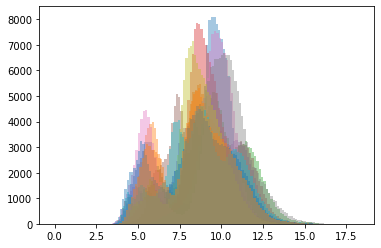

In [26]:
import matplotlib.pyplot as plt
for index, i in enumerate(ADT_dist):
	plt.hist(i.numpy(), bins=128, alpha=.4)
	if index > 10:
		break

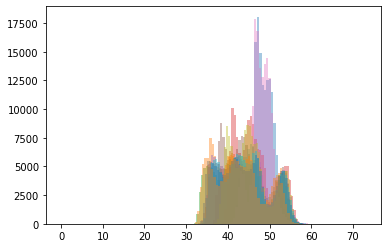

In [27]:
for index, i in enumerate(SCT_dist):
	plt.hist(i.numpy(), bins=128, alpha=.4)
	if index > 10:
		break

In [8]:
import networkx
SCT_g = networkx.from_numpy_matrix(SCT_adj_matrix)

In [34]:
SCT_adj_matrix[0]

<1x161764 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [9]:
ADT_g = networkx.from_numpy_matrix(ADT_adj_matrix)

In [10]:
import pickle
with open('/home/xiaomeng/jupyter_base/BioTech/data/ADT.networkx.g', 'wb') as f:
	pickle.dump(ADT_g, f)

In [11]:
import pickle
with open('/home/xiaomeng/jupyter_base/BioTech/data/SCT.networkx.g', 'wb') as f:
	pickle.dump(SCT_g, f)

In [41]:
import numpy as np
np.save('/home/xiaomeng/jupyter_base/BioTech/data/SCT.adj.top8.npy',SCT_adj_matrix)

In [42]:
import numpy as np
np.save('/home/xiaomeng/jupyter_base/BioTech/data/ADT.adj.top8.npy',ADT_adj_matrix)

In [44]:
import dgl
import torch.nn as nn

In [45]:
from dgl.nn import GraphConv

In [50]:
adt_feat = torch.tensor(ADT_feature.values[:, 1:-1].astype(float))
sct_feat = torch.tensor(SCT_feature.values[:, 1:-1].astype(float))

In [54]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.0/467.0 kB 1.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for torch_geometric: filename=torch_geometric-2.1.0.post1-py3-none-any.whl size=689860 sha256=069e65edd8a993f959ce34bff96757572bd7e2d4865d1d03f3ca61433fdb338b
  Stored in directory: /home/xiaomeng/.cache/pip/wheels/d0/1c/ed/a1eeba09902954614d226f99a0b68d203a76155bb3920659f2
Successfully built torch_geometric


In [55]:
import torch_geometric

ModuleNotFoundError: No module named 'torch_sparse'

In [56]:
torch.save(adt_feat, '/home/xiaomeng/jupyter_base/BioTech/data/ADT.feat.pt')

torch.save(sct_feat, '/home/xiaomeng/jupyter_base/BioTech/data/SCT.feat.pt')

In [3]:
import torch
print(torch.__version__)
print(torch.version.cuda)

1.12.1
11.6


In [7]:
from torch_geometric.data import Data
import torch

In [9]:
adt_feat = torch.load('/home/xiaomeng/jupyter_base/BioTech/data/ADT.feat.pt')

In [13]:
sct_feat = torch.load('/home/xiaomeng/jupyter_base/BioTech/data/SCT.feat.pt')

In [6]:
import numpy as np

sct_adj = np.load('/home/xiaomeng/jupyter_base/BioTech/data/SCT.adj.top8.npy', allow_pickle=True)
adt_adj = np.load('/home/xiaomeng/jupyter_base/BioTech/data/ADT.adj.top8.npy', allow_pickle=True)

In [7]:
sct_adj

array(<161764x161764 sparse matrix of type '<class 'numpy.float64'>'
	with 1294112 stored elements in Compressed Sparse Row format>,
      dtype=object)

In [8]:
data = Data(x=adt_feat, edge_index=adt_adj)

NameError: name 'adt_feat' is not defined

In [13]:
data.edge_index.flat

In [1]:
import pickle

In [16]:
with open('/home/xiaomeng/jupyter_base/BioTech/data/SCT.networkx.g', 'rb') as f:
	sct_g = pickle.load(f)

In [17]:
with open('/home/xiaomeng/jupyter_base/BioTech/data/ADT.networkx.g', 'rb') as f:
	adt_g = pickle.load(f)

In [18]:
import networkx
sct_adj_coo = networkx.to_scipy_sparse_matrix(sct_g, format='coo', weight=None)

In [19]:
adt_adj_coo = networkx.to_scipy_sparse_matrix(adt_g, format='coo', weight=None)

In [6]:
data = Data(x=sct_feat, edge_index=sct_adj_coo)

NameError: name 'Data' is not defined

In [21]:
data.edge_index

<161764x161764 sparse matrix of type '<class 'numpy.int64'>'
	with 2744148 stored elements in COOrdinate format>

In [ ]:
data.stores_as

In [10]:
import numpy as np

In [ ]:

with open('/home/xiaomeng/jupyter_base/BioTech/data/SCT.adj.coo.npy', 'wb') as f:
	np.save(f, sct_adj_coo)

In [24]:
with open('/home/xiaomeng/jupyter_base/BioTech/data/ADT.adj.coo.npy', 'wb') as f:
	np.save(f, adt_adj_coo)

In [17]:
import torch
sample_data = torch.load('./BioTech/data/data.pt')

In [18]:
sample_data

(Data(x=[9360, 6775], edge_index=[2, 31158], y=[9360], train_mask=[9360], val_mask=[9360], test_mask=[9360]),
 None)

In [23]:
label = SCT_feature.values[:,-1]

In [24]:
label

array([8.0, 13.0, 20.0, ..., 2.0, 9.0, 8.0], dtype=object)

In [25]:
type(label)

numpy.ndarray

In [27]:
label_pt = torch.FloatTensor(label.astype(float))

In [28]:
torch.save(label_pt, '/home/xiaomeng/jupyter_base/BioTech/data/label.pt')